In [7]:
import kagglehub as kh
import os.path as path
import os
import pandas as pd

means_monday, means_other = [], []

p = kh.dataset_download('borismarjanovic/price-volume-data-for-all-us-stocks-etfs')
p = path.join(p, "Data/Stocks")
dir_list = os.listdir(p)
for i in dir_list:
  try:
    df = pd.read_csv(path.join(p, i))
    means_monday.append(df[pd.to_datetime(df['Date']).dt.strftime("%A") == 'Monday']['Close'].mean())
    means_other.append(df[pd.to_datetime(df['Date']).dt.strftime("%A") != 'Monday']['Close'].mean())
  except Exception as e:
    pass

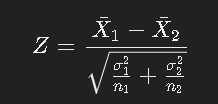

In [8]:
import numpy as np
import math

monday_var = np.nanvar(means_monday)
other_var = np.nanvar(means_other)
n = len(means_other)

Z = (np.nanmean(means_monday) - np.nanmean(means_other)) / math.sqrt((monday_var + other_var) / n)
Z

np.float64(0.008677277655022186)

In [9]:
from scipy.stats import norm

alpha = 0.05 
c = norm.ppf(1 - alpha / 2)
c

np.float64(1.959963984540054)

In [10]:
if -c < Z < c:
  print("stock prices on Mondays and other days are almost identical")
else:
  print("stock prices on Mondays and other days are not identical")

stock prices on Mondays and other days are almost identical
